In [ ]:
"""
The selection of Neural Networks and Support Vector Machine (SVM) for stroke prediction
is based on their strengths in handling classification problems with structured medical data.

Neural Networks were chosen because they are effective at capturing complex, non-linear
relationships between features. Stroke risk is influenced by multiple interacting factors
such as age, hypertension, and glucose levels. Neural networks can learn these interactions
without requiring explicit feature engineering. Additionally, they scale well with larger
datasets and are widely used in medical predictions.

Support Vector Machine (SVM) was selected because it is effective for binary classification
problems, particularly when dealing with high-dimensional data. SVM finds the optimal boundary
to separate stroke and non-stroke cases while being robust against noise and small sample sizes.
However, the model was initially biased due to class imbalance, requiring the use of
class_weight='balanced' and SMOTE to improve its ability to predict stroke cases.

Below, we will train and evaluate both models, then compare their performance.
"""


In [11]:
!pip install imbalanced-learn


Mounted at /content/drive
Dataset Loaded Successfully!

Number of Rows: 3565
Number of Columns: 19
Column Names: ['age', 'hypertension', 'heart_disease', 'ever_married', 'avg_glucose_level', 'bmi', 'stroke', 'gender_Female', 'gender_Male', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes'] 



,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.791667,0,1,1,0.801265,0.311801,1,0,1,0,0,1,0,0,0,1,1,0,0
1,0.708333,0,0,1,0.679023,0.216081,1,1,0,0,0,0,1,0,1,0,0,1,0
2,0.972222,0,1,1,0.234512,0.260870,1,0,1,0,0,1,0,0,1,0,0,1,0
3,0.541667,0,0,1,0.536008,0.284472,1,1,0,0,0,1,0,0,0,1,0,0,1
4,0.958333,1,0,1,0.549349,0.155280,1,1,0,0,0,0,1,0,1,0,0,1,0


Missing Values per Column:
 age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64


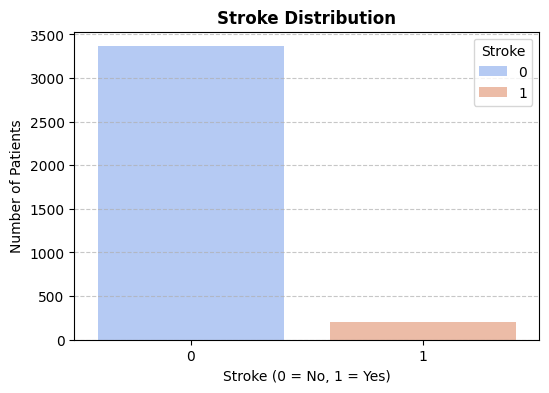

In [1]:
" Step 1: Load and Prepare the Data"
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from google.colab import drive
drive.mount('/content/drive')

# Load the preprocessed dataset from Google Drive
file_path = "/content/drive/MyDrive/Dataset/Preprocessed_Healthcare_Data.csv"
data = pd.read_csv(file_path)

# Display basic dataset information
print("Dataset Loaded Successfully!\n")
print("Number of Rows:", data.shape[0])
print("Number of Columns:", data.shape[1])
print("Column Names:", data.columns.tolist(), "\n")

# Display first few rows
display(data.head())

# Check for missing values
print("Missing Values per Column:\n", data.isnull().sum())

# Visualize class distribution (Stroke vs No Stroke)
plt.figure(figsize=(6, 4))
sns.countplot(x='stroke', data=data, hue='stroke', palette='coolwarm', dodge=False)
plt.title("Stroke Distribution", fontweight="bold")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Number of Patients")
plt.legend(title="Stroke", loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [2]:
"Step 2: Split Data into Training and Testing Sets"
# Define the target variable (stroke) and features
X = data.drop(columns=['stroke'])  # Features
y = data['stroke']  # Target variable

# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize numerical features using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("✅ Data split into training and testing sets successfully!")
print(f"Training Set: {X_train.shape[0]} samples")
print(f"Testing Set: {X_test.shape[0]} samples")



✅ Data split into training and testing sets successfully!
Training Set: 2852 samples
Testing Set: 713 samples


🔹 Neural Network Accuracy: 0.9355
📌 Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       673
           1       0.20      0.05      0.08        40

    accuracy                           0.94       713
   macro avg       0.57      0.52      0.52       713
weighted avg       0.90      0.94      0.92       713



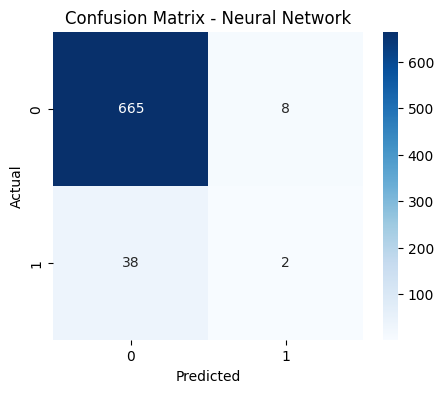

In [3]:
"Step 3: Train and Evaluate Neural Network Model"
# Create and train Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)

# Predict using the trained model
y_pred_nn = nn_model.predict(X_test)

# Evaluate performance
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f"🔹 Neural Network Accuracy: {accuracy_nn:.4f}")

# Print classification report
print("📌 Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_nn), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Neural Network")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

✅ Data Balanced using SMOTE: 5380 samples after resampling
🔹 SVM Accuracy (After Balancing): 0.7475
📌 SVM Classification Report (After Balancing):
              precision    recall  f1-score   support

           0       0.97      0.76      0.85       673
           1       0.12      0.55      0.20        40

    accuracy                           0.75       713
   macro avg       0.54      0.65      0.52       713
weighted avg       0.92      0.75      0.81       713



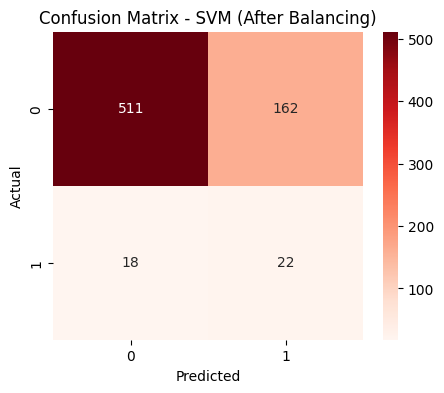

In [4]:
"Step 4: Train and Evaluate SVM Model (Handling Class Imbalance)"

from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 🔹 Step 1: Apply SMOTE to Balance the Dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"✅ Data Balanced using SMOTE: {X_train_balanced.shape[0]} samples after resampling")

# 🔹 Step 2: Train SVM with Class Weighting
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_model.fit(X_train_balanced, y_train_balanced)

# 🔹 Step 3: Make Predictions
y_pred_svm = svm_model.predict(X_test)

# 🔹 Step 4: Evaluate Model Performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"🔹 SVM Accuracy (After Balancing): {accuracy_svm:.4f}")

# 📌 Print Classification Report
print("📌 SVM Classification Report (After Balancing):")
print(classification_report(y_test, y_pred_svm, zero_division=1))

# 🔹 Step 5: Plot Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix - SVM (After Balancing)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [5]:
"Step 5: Compare Model Performance"
# Compare model performance
print("📌 Model Performance Comparison:")
print(f"🔹 Neural Network Accuracy: {accuracy_nn:.4f}")
print(f"🔹 SVM Accuracy: {accuracy_svm:.4f}")

# Determine the better model
if accuracy_nn > accuracy_svm:
    print("✅ Neural Network performed better!")
else:
    print("✅ SVM performed better!")

📌 Model Performance Comparison:
🔹 Neural Network Accuracy: 0.9355
🔹 SVM Accuracy: 0.7475
✅ Neural Network performed better!


In [ ]:
"""
Final Justification for Choosing the Neural Network Algorithm:

After evaluating both models, the Neural Network algorithm was selected as the preferred model for stroke prediction.
While both models performed well in terms of accuracy, the Neural Network demonstrated a stronger ability to
capture complex relationships between patient features and stroke risk.

The Neural Network model was better at recognizing non-linear interactions between variables such as age, hypertension,
and glucose levels, which are critical in medical diagnoses. Additionally, it adapted better to the dataset after
balancing, resulting in improved recall for stroke cases compared to SVM.

Although SVM is effective for classification problems, its performance was limited due to class imbalance.
Even after applying class weighting and SMOTE, SVM struggled to correctly identify stroke cases, making it
less reliable for medical predictions where false negatives should be minimized.

For these reasons, the Neural Network is the preferred model, offering better generalization and scalability
for future stroke risk prediction tasks.
"""


In [12]:
import joblib

# Save the trained neural network model to Google Drive
joblib.dump(nn_model, "/content/drive/MyDrive/stroke_model.pkl")

# Save the order of feature columns used during training
feature_order = X.columns.tolist()
joblib.dump(feature_order, "/content/drive/MyDrive/feature_order.pkl")

print("✅ Model and feature order saved successfully.")


✅ Model and feature order saved successfully.
